Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div>
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Authors:** Navid Rekab-saz, Oleg Lesota<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div>

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div>

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div >

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div>
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stopwords = stopwords.words('english')

test_path = "nlp2023_24_data/thedeep.subset.test.txt"
train_path = "nlp2023_24_data/thedeep.subset.train.txt"
valid_path = "nlp2023_24_data/thedeep.subset.validation.txt"
labels = "nlp2023_24_data/thedeep.labels.txt"

df_test = pd.read_csv(test_path, header=None, names=["ID", "Text", "Label"], delimiter=",")
df_train = pd.read_csv(train_path, header=None, names=["ID", "Text", "Label"], delimiter=",")
df_valid = pd.read_csv(valid_path, header=None, names=["ID", "Text", "Label"], delimiter=",")
labels = pd.read_csv(labels, header=None, names=["ID", "Label"], delimiter=",")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nikita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import re
from nltk.stem.porter import *

#Text preprocesssing performed. 
#Lower all the words in the sentence
#Tokenize each word (sentence is represented as list of elements, where each element is a word)
#Remove numbers with <NUM>
#Remove stowpords, such as 'i'm' . Remove punctuation!
#Use stemmer. attacks -> attack
def preprocessing(df):
    "Takes unprocessed Dataframe and returns already modified dataframe."
    for i,row in df.iterrows():
        sentence = row['Text'].lower()
        sentence = re.sub(r'\d+','',sentence)
        # sentence = sentence.split()
        tokenizer = RegexpTokenizer(r'\w+|<NUM>')
        sentence = tokenizer.tokenize(sentence)
        remove_stopw = [word for word in sentence if not word in stopwords]
        stemmer = PorterStemmer()
        stemmed_sentence = [stemmer.stem(word) for word in remove_stopw]
        df.at[i, 'Text'] = stemmed_sentence
    return df

#PREPROCESS ALL THE DATASETS
df_test_prepr = preprocessing(df_test)
df_train_prepr = preprocessing(df_train)
df_valid_prepr = preprocessing(df_valid)

In [3]:
df_train_prepr

,ID,Text,Label
0,5446,"[addit, immedi, life, save, intervent, unicef,...",9
1,8812,"[approxim, million, peopl, classifi, phase, mi...",3
2,16709,"[aid, import, held, recent, commerci, food, fu...",5
3,3526,"[heavi, rainfal, well, onrush, water, upstream...",0
4,4928,"[base, field, report, main, product, challeng,...",3
...,...,...,...
12105,12744,"[total, gap, number, peopl, requir, assist, re...",8
12106,9655,"[food, crisi, loom, countri, season, maiz, har...",0
12107,6963,"[acut, wateri, diarrhoea, awd, continu, report...",4
12108,923,"[south, india, grappl, drought, water, shortag...",11


# Creating dictionary

In [4]:
from collections import Counter


def create_vocab_dict(preprocessed: pd.DataFrame = df_train_prepr,
                      topN: int = 1000):

    all_words = list([item for sublist in preprocessed['Text'] for item in sublist])

    dictionary = pd.DataFrame.from_dict(Counter(all_words), orient='index').reset_index()
    dict_full = dictionary.rename(columns={'index':'word', 0:'count'})
    dict_full = dict_full.sort_values(by='count', ascending = False)
    dict_cut = dict_full.head(topN)
    
    return dict_full, dict_cut

In [5]:
dict_size = 1500


dict_full, dict_cut = create_vocab_dict(topN=dict_size)
dict_cut

,word,count
284,case,5767
156,report,5146
51,food,4380
17,peopl,3910
27,area,3572
...,...,...
592,describ,54
1235,attent,54
3051,might,54
1277,escap,54


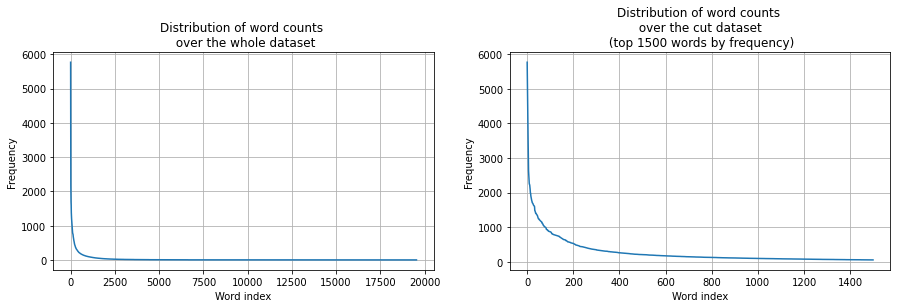

In [6]:
import matplotlib.pyplot as plt


figure = plt.figure(figsize = (15, 4))

figure.add_subplot(1, 2, 1)


plt.plot(range(len(dict_full['count'])),dict_full['count'])
plt.grid(True)
plt.xlabel('Word index')
plt.ylabel('Frequency')
plt.title('Distribution of word counts \n over the whole dataset')



figure.add_subplot(1, 2, 2)
plt.plot(range(len(dict_cut['count'])),dict_cut['count'])
plt.grid(True)
plt.xlabel('Word index')
plt.ylabel('Frequency')
plt.title(f'Distribution of word counts \n over the cut dataset \n (top {dict_size} words by frequency)')
plt.show()


#We can clearly see a huge disbalance which is to be addressed with model.

All out-of-vocabulary words were simply removed as well as numbers. For dictionary, it was decided to keep top N=300 words judging by the graph. Although it is to be experimented with when training the model,therefore N is subject to changing.

<h3>OOV handling</h3>

Now we want to filter our datasets by removing all OOV words from our test/train/valid datasets. We replaced the tokens by <OOV> placeholder. This saves the sentence structure, that will be important during training.

In [7]:
#REMOVE OOV FROM TEST,TRAIN,VALIDATION DATASET.

# def replace_oov(dataframe,freq_dict,placeholder='<OOV>'):
#     freq_words = freq_dict['word'].to_numpy()
#     for i,row in dataframe.iterrows():
#         vector = row['Text']
#         vector = [word if word in freq_words else placeholder for word in vector]
#         dataframe.at[i, 'Text'] = vector
#     return dataframe

# # replace_oov(df_test_prepr,dict_cut)

# replaced_df =  replace_oov(df_test_prepr,dict_cut)
# print(replaced_df)

def replace_oov(dataframe, freq_dict, placeholder='<OOV>'):
    # Convert frequently used words into a numpy array
    freq_words = freq_dict['word'].to_numpy()
    total_counter = 0
    replaced_count = 0
    for i, row in dataframe.iterrows():
        vector = row['Text']
        total_counter += len(vector)
        new_vector = []
        for word in vector:
            if word in freq_words:
                new_vector.append(word)
            else:
                new_vector.append(placeholder)
                replaced_count += 1
        dataframe.at[i, 'Text'] = new_vector

    print(f"Total words replaced: {replaced_count} out of total words: {total_counter} . In percentage: {np.round(replaced_count/total_counter*100,2)}%")
    return dataframe

df_test_prepr = replace_oov(df_test_prepr,dict_cut)
df_train_prepr = replace_oov(df_train_prepr,dict_cut)
df_valid_prepr = replace_oov(df_valid_prepr,dict_cut)

Total words replaced: 19446 out of total words: 107095 . In percentage: 18.16%
Total words replaced: 88964 out of total words: 511234 . In percentage: 17.4%
Total words replaced: 19392 out of total words: 108671 . In percentage: 17.84%


# Creating sentence vectors

In [8]:
import numpy as np
from tqdm import tqdm

class FeatureMatrix:
    def __init__(self,
                 text_df: pd.DataFrame,
                 dictionary: pd.DataFrame = dict_cut):
    
        
        self.dictionary = dictionary.to_numpy()
        self.vocabulary = self.dictionary[:, 0]
        self.dict_size = len(self.dictionary)
        self.text_df = text_df
        self.M = len(text_df.axes[0])
    
        
        # text_df['text_string'] = text_df['Text'].apply(' '.join)
        
        
        
    def tc(self, d, v):
        
        """
        number of times 'v' appears in 'd'
        
        """
        
        return d.count(v) 
    
    def df(self, v):
        
        """
        number of 'd' that contain 'v'
        
        """
        
        # return self.text_df['text_string'].str.contains(v, case=False).sum()
        return self.text_df['Text'].apply(lambda doc: v in doc).sum()
    
    
    
    def calc_sparcity(self, feat_matr):
        
        
        """
        calculate the percentage of zeros of a feature matrix
        
        """
        
        zeros_count = np.count_nonzero(feat_matr.flatten() == 0)
        all_count = len(feat_matr.flatten())
        
        sparsity = (zeros_count / all_count) * 100
        
        return sparsity
        
        

    def tf_idf_matr(self):
        
        """
        
        extract term frequency-Inverse document frequency fearure matrix as follows from the slides
        
        """
        
        
        feat_matrix = np.zeros(shape=(self.M, self.dict_size))

        for v in range(feat_matrix.shape[1]):
            tc = np.array([self.tc(text, self.vocabulary[v]) for text in self.text_df['Text']])
            df = self.df(self.vocabulary[v])
            feat_matrix[:, v] = np.log(1 + tc) * np.log(self.M / df+1)
        
        sparsity = self.calc_sparcity(feat_matrix)
        
        return feat_matrix, sparsity
    
    def tc_matr(self):
        
        """
        
        extract term frequency fearure matrix as follows from the slides
        
        """
        
        
        feat_matrix = np.zeros(shape=(self.M, self.dict_size))
        
        for v in range(feat_matrix.shape[1]):
            tc = np.array([self.tc(text, self.vocabulary[v]) for text in self.text_df['Text']])
            feat_matrix[:, v] = tc
        
        sparsity = self.calc_sparcity(feat_matrix)
        
        return feat_matrix, sparsity
        
        
    

In [9]:
fm_train = FeatureMatrix(df_train_prepr)
fm_test = FeatureMatrix(df_test_prepr)
fm_val = FeatureMatrix(df_valid_prepr)

tf_idf_train, tf_idf_sparsity_train = fm_train.tf_idf_matr()
tf_idf_test, tf_idf_sparsity_test = fm_test.tf_idf_matr()
tf_idf_val, tf_idf_sparsity_val = fm_val.tf_idf_matr()

tc_train, tc_sparsity_train = fm_train.tc_matr()
tc_test, tc_sparsity_test = fm_test.tc_matr()
tc_val, tc_sparsity_val = fm_val.tc_matr()


In [10]:
tf_idf_train
# tc_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.14310548, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.14310548, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.13150819, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.35214901, ..., 0.        , 0.        ,
        0.        ]])

In [11]:
print(tf_idf_train.shape)

(12110, 1500)


In [12]:
x = ['train','test','validation']


sparsities = pd.DataFrame({
    'data_split' : x,
    'tc sparcity': [tc_sparsity_train, tc_sparsity_test, tc_sparsity_val],
    'tf_idf sparcity': [tf_idf_sparsity_train, tf_idf_sparsity_test, tf_idf_sparsity_val]
})

sparsities

,data_split,tc sparcity,tf_idf sparcity
0,train,98.204657,98.204657
1,test,98.229056,98.229056
2,validation,98.228377,98.228377


Clearly, sparsity is large in all scenarios.

<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div>

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

# Dummy baseline

0         Protection
1               Food
2         Livelihood
3        Agriculture
4               Food
            ...     
12105      Nutrition
12106    Agriculture
12107         Health
12108           WASH
12109           Food
Name: Label, Length: 12110, dtype: object


<AxesSubplot:>

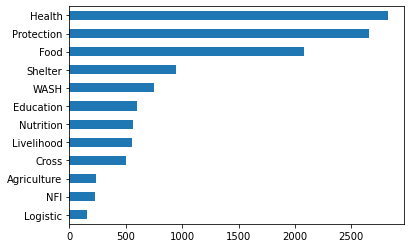

In [13]:
#Would be insightful to know the label distribution

labels_named = df_train_prepr['Label'].apply(lambda l: labels['Label'][l])
print(labels_named)
labels_named.value_counts(ascending = True).plot.barh()

In [14]:
from sklearn.dummy import DummyClassifier


dummy = DummyClassifier(strategy = 'most_frequent')


X_train = df_train_prepr['Text'].to_numpy()
y_train = df_train_prepr['Label'].to_numpy()

X_test = df_test_prepr['Text'].to_numpy()
y_test = df_test_prepr['Label'].to_numpy()

X_val = df_valid_prepr['Text'].to_numpy()
y_val = df_valid_prepr['Label'].to_numpy()

# print(X_train)
# print(y_train)
dummy.fit(X_train, y_train)


dummy_score_test = dummy.score(X_test, y_test)
dummy_score_val = dummy.score(X_val, y_val)


print("Using the dummy baseline we get...")
print(f"{(dummy_score_test*100)}% accuracy on test")
print(f"{(dummy_score_val*100)} accuracy on validation")

Using the dummy baseline we get...
24.470134874759154% accuracy on test
25.616332819722647 accuracy on validation


# Training and tuning classifiers

<h3>Neural Network</h3>

In [30]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.set_default_device(device)
torch.set_default_dtype(torch.float32)
torch.__version__

'2.1.0'

In [52]:
class SimpleNetwork(nn.Module):
    def __init__(self, feature_dim, hidden_dim, output_dim, dropout_prob = 0.5):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_prob))
        self.classifier = nn.Linear(hidden_dim, output_dim)
        
    def forward(self,x):
        return self.classifier(self.layer(x))

In [44]:
class WordDataset(Dataset):
    def __init__(self, feature_set, labels):
        self.feature_set = torch.tensor(feature_set, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        return self.feature_set[index], self.labels[index]
    

In [45]:
tf_idf_train_data = WordDataset(feature_set = tf_idf_train,
                                labels = y_train)

tf_idf_valid_data = WordDataset(feature_set = tf_idf_val,
                              labels = y_val)

tf_idf_train_loader = DataLoader(dataset = tf_idf_train_data,
                                 batch_size = 32,
                                 shuffle = True)

tf_idf_valid_loader = DataLoader(dataset = tf_idf_valid_data,
                                 batch_size = 32,
                                 shuffle = False)



tc_train_data = WordDataset(feature_set = tc_train,
                            labels = y_train)


tc_valid_data = WordDataset(feature_set = tc_val,
                            labels = y_val)

tc_train_loader = DataLoader(dataset = tc_train_data,
                             batch_size = 32,
                             shuffle = True)

tc_valid_loader = DataLoader(dataset = tc_valid_data,
                             batch_size = 32,
                             shuffle = False)





In [104]:
from tqdm.auto import tqdm
from pathlib import Path


def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.modules.loss,
               optimizer: torch.optim):
    
    train_loss, train_acc = 0, 0
    
    model.train()
    
    for batch, (X,y) in enumerate(dataloader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        y_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        acc = torch.eq(y_class, y).sum().item() / len(y_pred)
        
        train_loss += loss.item()
        train_acc += acc
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    
    return train_loss, train_acc
    
    
    
def valid_step(model: nn. Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn : nn.Module):

    model.eval()

    valid_loss, valid_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            y_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            valid_loss += loss.item()
            valid_acc += torch.eq(y_class, y).sum().item() / len(y_pred)

    valid_loss /= len(dataloader)
    valid_acc /= len(dataloader)

    return valid_loss, valid_acc

def train_validate_save(model: nn.Module,
          train_loader: torch.utils.data.DataLoader,
          val_loader: torch.utils.data.DataLoader,
          optimizer: torch.optim,
          loss_fn: nn.Module,
          model_name: str,
          epochs = 10,
          save = True,
          stats_show = True):

    results = dict(train_loss=[], train_acc=[], valid_loss=[], valid_acc=[])

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_loader,
                                           optimizer=optimizer,
                                           loss_fn=loss_fn)

        
        val_loss, val_acc = valid_step(model=model,
                                       dataloader=val_loader,
                                      loss_fn=loss_fn)
        
        
        if epoch % 5 == 0:
            print(f"Epoch: {epoch+5} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Validation loss: {val_loss:.4f} | Validation acc: {val_acc:.4f}")
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['valid_loss'].append(val_loss)
        results['valid_acc'].append(val_acc)
        
    if save:
        
        path = Path('torch_models')
        path.mkdir(exist_ok = True)

        torch.save(model.state_dict(), f'torch_models/{model_name}({epochs}_epochs).pth')
        

    plt.figure(figsize=(15, 7))

    epochs = np.arange(epochs)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results["train_loss"], label = 'train loss')
    plt.plot(epochs, results["valid_loss"], label = 'valid_loss')
    plt.title(f'Loss-{model_name}')

    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(epochs, results["train_acc"], label='train accuracy')
    plt.plot(epochs, results["valid_acc"], label='validation accuracy')
    plt.title(f'Accuracy-{model_name}')

    plt.legend()

    plt.suptitle(f'{model_name} curves')
    
    plt.savefig(f'torch_models/{model_name}_train_stats')
    
    if not stats_show:

        plt.close()
    
    return model


In [105]:
# test_model = nn_models[0]
# optimizer = torch.optim.Adam(params = test_model.parameters(), weight_decay = 0, 
#                                                            lr = 1e-3)
# loss_fn = nn.CrossEntropyLoss()
# train_validate_save(test_model, tf_idf_train_loader, tf_idf_valid_loader , 
#                    optimizer, loss_fn, 'nlp_test', epochs = 20, save = True)

In [118]:
def get_loaded_model(model: nn.Module,
                     state_dict_path: str):
    
    "Upload saved state_dict(parameters) to previously defined torch model"
    
    state_dict = torch.load(state_dict_path)
    model.load_state_dict(state_dict)
    return model


def predict_sentence(model, feature):
    feature = np.array(feature)
    feature = torch.tensor(feature, dtype=torch.float32).unsqueeze(0)
    with torch.no_grad():
        pred = model(feature)
        pred = F.softmax(pred, dim=1)
        pred = torch.argmax(pred, dim=1)
    return pred.item()

In [155]:
# from sklearn.metrics import accuracy_score

# y_test_predictions = []
# for f in tf_idf_val:
#     y = predict_sentence(mod_parametrized, f)
#     y_test_predictions.append(y)
    
# y_test_predictions = np.array(y_test_predictions)    


# accuracy_score(y_val, y_test_predictions)

In [156]:
from sklearn.metrics import accuracy_score
from PIL import Image


nn_models = []
for dim in [10, 50, 100, 300, 1000]:
    model = SimpleNetwork(feature_dim = dict_size,
                        hidden_dim = dim,
                        output_dim = len(labels))
    nn_models.append(model)



def choose_best_model(feature_matrix: np.array,
                      train_loader,
                      valid_loader,
                      feat_matr_name:str):
    
    

    trained_models = []
    validation_accs = []

    for i, model in enumerate(nn_models):
        
        print(f'training {feat_matr_name} model {i}...')

        optimizer = torch.optim.Adam(params = model.parameters())
        loss_fn = nn.CrossEntropyLoss()
        model_trained = train_validate_save(model, 
                                           train_loader, 
                                           valid_loader, 
                                           optimizer, 
                                           loss_fn, 
                                           f'{feat_matr_name}_model_{i}', 
                                           epochs=10, 
                                           save=True,
                                           stats_show=False)
        
        trained_models.append(model_trained)

        y_predictions = []
        
        for f in feature_matrix:
            y = predict_sentence(model_trained, f)
            y_predictions.append(y)
        validation_accs.append(accuracy_score(y_val, y_predictions))
        
    best_model_idx = np.argmax(validation_accs)
        
    best_model = trained_models[best_model_idx]
    
    print(f'The best model is {feat_matr_name}_model_{np.argmax(validation_accs)}')
    
    model_stats_path = f"torch_models/{feat_matr_name}_model_{best_model_idx}_train_stats.png"

    return best_model, model_stats_path

In [1]:
tf_idf_best_model, tf_idf_best_model_stats = choose_best_model(tf_idf_val,
                                             tf_idf_train_loader,
                                             tf_idf_valid_loader,
                                             'tf_idf')

In [2]:
tc_best_model, tc_best_model_stats = choose_best_model(tc_val,
                                     tc_train_loader,
                                     tc_valid_loader,
                                     'tc')

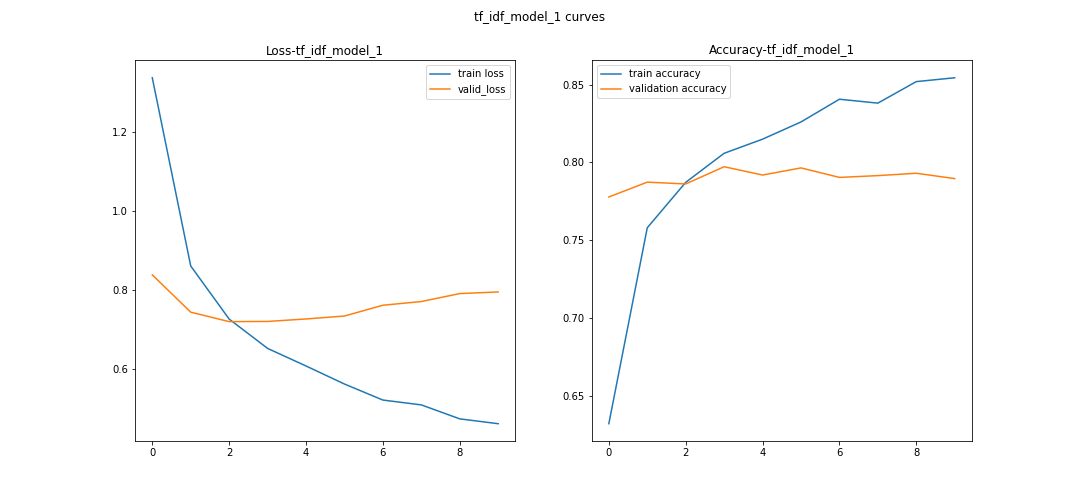

In [159]:
Image.open(tf_idf_best_model_stats)

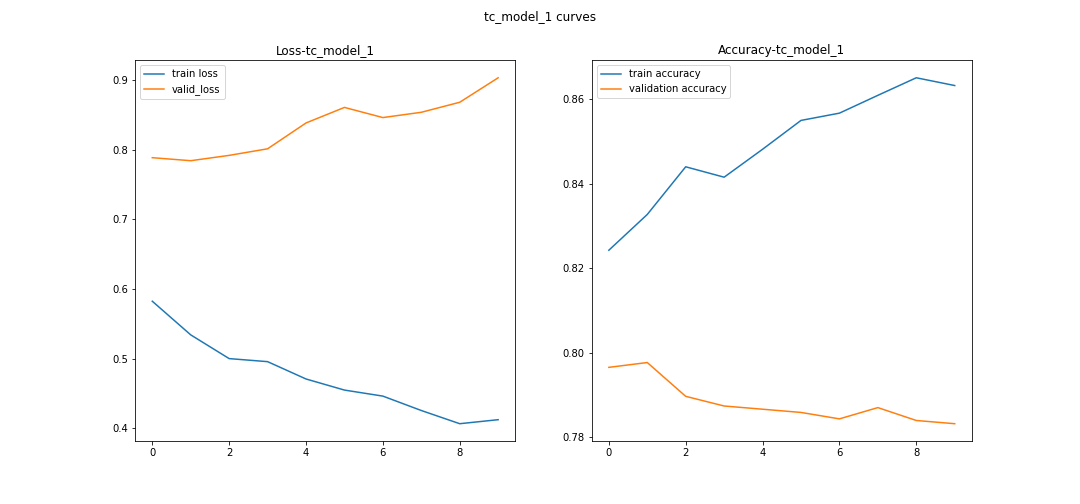

In [160]:
Image.open(tc_best_model_stats)

In colclusion, hidden size of 50 seems to work the best. Although, what we see above is an obvious example of overfitting.

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div>
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define your feature matrices and labels
X_train_tc = tc_train  # Term Count matrix for training data
X_train_tfidf = tf_idf_train  # TF-IDF matrix for training data
y_train = df_train_prepr['Label'].to_numpy()  # Training labels

X_val_tc = tc_val  # Term Count matrix for validation data
X_val_tfidf = tf_idf_val  # TF-IDF matrix for validation data
y_val = df_valid_prepr['Label'].to_numpy()  # Validation labels

# Hyperparameters to tune for Logistic Regression
C_values = [0.001, 0.01, 1, 10, 100]

# Lists to store results
results_tc = []
results_tfidf = []

# Train and evaluate for Term Count matrix
for C in C_values:
    lr = LogisticRegression(C=C, max_iter=1000)  # Increase max_iter if convergence issues arise
    lr.fit(X_train_tc, y_train)
    y_pred = lr.predict(X_val_tc)
    accuracy = accuracy_score(y_val, y_pred)
    results_tc.append((C, accuracy))

# Train and evaluate for TF-IDF matrix
for C in C_values:
    lr = LogisticRegression(C=C, max_iter=1000)
    lr.fit(X_train_tfidf, y_train)
    y_pred = lr.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_pred)
    results_tfidf.append((C, accuracy))

# Report the results
print("Results for Term Count matrix:")
for C, accuracy in results_tc:
    print(f"C = {C}, Validation Accuracy = {accuracy*100:.2f}%")

print("\nResults for TF-IDF matrix:")
for C, accuracy in results_tfidf:
    print(f"C = {C}, Validation Accuracy = {accuracy*100:.2f}%")
